In [207]:
#Basic imports
import numpy as np
import pandas as pd
from random import *
import matplotlib.pyplot as plt
from minisom import MiniSom

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn.preprocessing import MinMaxScaler
import susi

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = 'colab'

import re
from pylab import bone, pcolor, colorbar, plot, show

lendo o arquivo

In [251]:
df = pd.read_excel("StartUpsESG_0602.xlsx")

In [252]:
#visualização
df

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,6422,SUPP Network,United States,0,0.000,0.000,0.000,0.000,0.0,0.30,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1
6537,6423,Thousand Token,Colombia,0,0.000,0.000,0.000,0.000,0.0,0.10,...,82.2,70,1.153511e+10,3.451576,9.907686,1.38160,50.4,4.063790,4.82347,0
6538,6424,Cryptocurrency Market,Spain,0,0.000,0.000,0.000,0.000,0.0,0.70,...,36.1,70,5.538257e+10,3.896177,6.713329,5.19562,34.7,4.451561,3.92247,0
6539,6425,IQ Token,Belarus,0,0.000,0.000,0.000,0.000,0.0,0.00,...,75.4,10,1.426500e+09,2.376262,6.228334,2.84452,25.2,0.000000,4.51118,0


tirando uma cópia do arquivo

In [253]:
X = df.copy(deep = True)
X = X[["Raised", "E", "S", "G","ESG","Country"]]
X

,Raised,E,S,G,ESG,Country
0,5986183.0,0.008,0.002,0.000,0.010,Lithuania
1,0.0,0.010,0.006,0.002,0.018,Netherlands
2,3500000.0,0.010,0.000,0.004,0.014,Austria
3,0.0,0.006,0.000,0.002,0.008,"Hong Kong SAR, China"
4,0.0,0.000,0.011,0.006,0.017,United States
...,...,...,...,...,...,...
6536,0.0,0.000,0.000,0.000,0.000,United States
6537,0.0,0.000,0.000,0.000,0.000,Colombia
6538,0.0,0.000,0.000,0.000,0.000,Spain
6539,0.0,0.000,0.000,0.000,0.000,Belarus


In [254]:
XsemC = X.drop(['Country'], axis=1)
country = X['Country']

In [255]:
country

0                  Lithuania
1                Netherlands
2                    Austria
3       Hong Kong SAR, China
4              United States
                ...         
6536           United States
6537                Colombia
6538                   Spain
6539                 Belarus
6540                Thailand
Name: Country, Length: 6541, dtype: object

## Clustering

In [256]:
sc = MinMaxScaler(feature_range=(0,1)).set_output(transform="pandas")
sc.fit(XsemC)
XsemC=sc.transform(XsemC)
type(XsemC)
XsemC

,Raised,E,S,G,ESG
0,0.005986,0.100,0.033333,0.000000,0.166667
1,0.000000,0.125,0.100000,0.033333,0.300000
2,0.003500,0.125,0.000000,0.066667,0.233333
3,0.000000,0.075,0.000000,0.033333,0.133333
4,0.000000,0.000,0.183333,0.100000,0.283333
...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000
6537,0.000000,0.000,0.000000,0.000000,0.000000
6538,0.000000,0.000,0.000000,0.000000,0.000000
6539,0.000000,0.000,0.000000,0.000000,0.000000


In [257]:
XsemC['Country'] = country

In [258]:
XsemC

,Raised,E,S,G,ESG,Country
0,0.005986,0.100,0.033333,0.000000,0.166667,Lithuania
1,0.000000,0.125,0.100000,0.033333,0.300000,Netherlands
2,0.003500,0.125,0.000000,0.066667,0.233333,Austria
3,0.000000,0.075,0.000000,0.033333,0.133333,"Hong Kong SAR, China"
4,0.000000,0.000,0.183333,0.100000,0.283333,United States
...,...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000,United States
6537,0.000000,0.000,0.000000,0.000000,0.000000,Colombia
6538,0.000000,0.000,0.000000,0.000000,0.000000,Spain
6539,0.000000,0.000,0.000000,0.000000,0.000000,Belarus


In [259]:
XsemC = pd.get_dummies(XsemC, dtype=float)

In [260]:
XsemC

,Raised,E,S,G,ESG,Country_Afghanistan,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Tunisia,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Country_Venezuela, RB",Country_Vietnam,Country_Zimbabwe,Country_india
0,0.005986,0.100,0.033333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.125,0.100000,0.033333,0.300000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003500,0.125,0.000000,0.066667,0.233333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.075,0.000000,0.033333,0.133333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000,0.183333,0.100000,0.283333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6537,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6538,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6539,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Time to build our clusters

In [261]:
#data = X.values
data = XsemC.values
som_shape = (2, 2)
som = MiniSom(som_shape[0], som_shape[1], 118, sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)
#som.train_batch(data, 500, verbose=True)

som.pca_weights_init(data)
som.train(data, 100000, verbose=True)

c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\minisom.py:384: ComplexWarning:

Casting complex values to real discards the imaginary part



 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.8571942172197573


In [262]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index

array([3, 3, 3, ..., 1, 2, 3], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


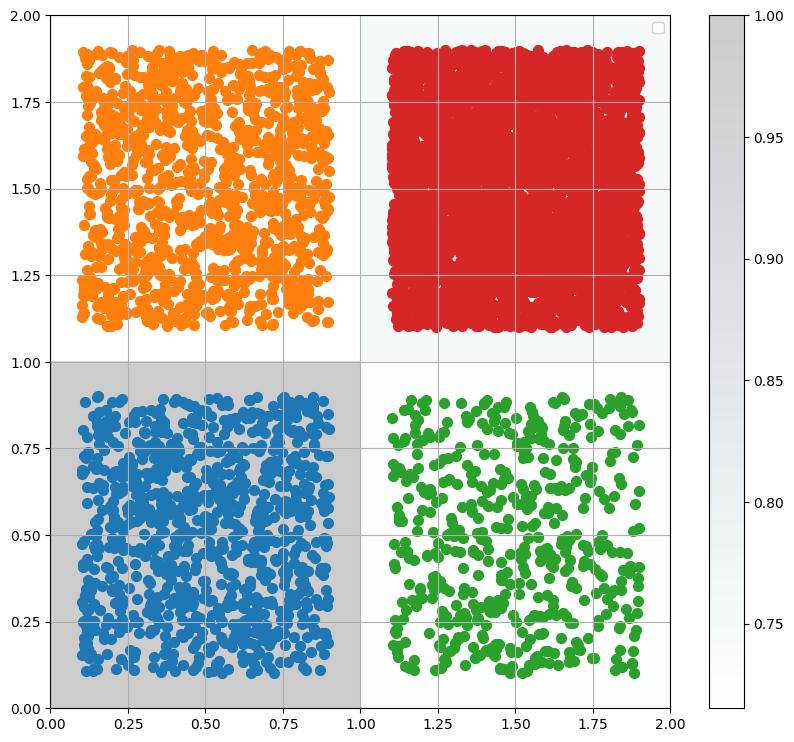

In [263]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

ar_x = []
ar_y = []
for c in np.unique(cluster_index):
#    idx_target = target==c
    coords_x = w_x[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    coords_y = w_y[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    plt.scatter(coords_x, coords_y, s=50)
    ar_x.append(coords_x[0])
    ar_y.append(coords_y[0])
    
for i in ar_x:
    pos = ar_x.index(i)
    #plt.text(ar_x[pos], ar_y[pos], y[pos])
    
plt.legend(loc='upper right')
plt.grid()

In [264]:
XsemC['Cluster'] = cluster_index

In [265]:
XsemC

,Raised,E,S,G,ESG,Country_Afghanistan,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Country_Venezuela, RB",Country_Vietnam,Country_Zimbabwe,Country_india,Cluster
0,0.005986,0.100,0.033333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.000000,0.125,0.100000,0.033333,0.300000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.003500,0.125,0.000000,0.066667,0.233333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.000000,0.075,0.000000,0.033333,0.133333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000,0.183333,0.100000,0.283333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6537,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6538,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6539,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [266]:
df['Cluster'] = cluster_index

In [267]:
df.to_csv("dadosClusterizadosMinisom.csv", index=False)

In [222]:
X = XsemC

In [223]:
X

,Raised,E,S,G,ESG,Country_Afghanistan,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Country_Venezuela, RB",Country_Vietnam,Country_Zimbabwe,Country_india,Cluster
0,0.005986,0.100,0.033333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.000000,0.125,0.100000,0.033333,0.300000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.003500,0.125,0.000000,0.066667,0.233333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.000000,0.075,0.000000,0.033333,0.133333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000,0.183333,0.100000,0.283333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6537,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6538,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6539,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


## PCA (Principal Components Anlysis)

But first, we will create a seperate, smaller DataFrame, plotX, to plot our data with. The reason we create a smaller DataFrame is so that we can plot our data faster, and so that our plots do not turn out looking too messy or over-crowded.

In [224]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
#plotX = pd.DataFrame(np.array(X.sample(5000))) # original do tutorial
plotX = XsemC

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = XsemC.columns

initialize our PCA models

In [225]:
pca_2d = PCA(n_components=2)

In [226]:
#PCA with two principal components
pca_3d = PCA(n_components=3)

build our new DataFrames

In [227]:
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [228]:
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(['Cluster'],axis=1)))

Rename the columns of these newly created DataFrames

In [229]:
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns

In [161]:
plotX = pd.concat([plotX,PCs_2d],axis=1, join='inner')

In [230]:
plotX = pd.concat([plotX,PCs_3d], axis=1, join='inner')

now we divide our DataFrame, plotX, into three new DataFrames.

Each of these new DataFrames will hold all of the values contained in exacltly one of the clusters. For example, all of the values contained within the DataFrame, cluster0 will belong to 'cluster 0', and all the values contained in DataFrame, cluster1 will belong to 'cluster 1', etc.

In [231]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]

In [232]:
init_notebook_mode(connected=True)

## PCA Visualizations:

In [205]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(100, 200, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

KeyError: 'PC1_2d'

In [233]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(100, 255, 100, 0.8)'),
                    text = None)


data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [155]:
X

,ESG,E,S,G,Raised,Country_Afghanistan,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Country_Venezuela, RB",Country_Vietnam,Country_Zimbabwe,Country_india,Cluster
0,0.166667,0.100,0.033333,0.000000,0.005986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.300000,0.125,0.100000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.233333,0.125,0.000000,0.066667,0.003500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.133333,0.075,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.283333,0.000,0.183333,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
6537,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6538,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6539,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
